**Customer Churn Prediction - Portfolio**

***By Shalsabilla Varin R***

#1. Import Library

In [ ]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

# 2. Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_train.csv to data_train.csv
Saving data_test.csv to data_test.csv


In [ ]:
data = pd.read_csv("Data Train.csv")
data_test = pd.read_csv("Data Test.csv")
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
print(data.shape)
print(data_test.shape)

(4250, 20)
(750, 20)


In [ ]:
def categorize_binner(value):
  if value == "yes":
    return 1
  else:
    return 0

data["is_churn"] = data["churn"].apply(categorize_binner)
data["is_intl_plan"] = data["international_plan"].apply(categorize_binner)
data["is_vmail_plan"] = data["voice_mail_plan"].apply(categorize_binner)

data_test["is_intl_plan"] = data_test["international_plan"].apply(categorize_binner)
data_test["is_vmail_plan"] = data_test["voice_mail_plan"].apply(categorize_binner)

In [ ]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,is_churn,is_intl_plan,is_vmail_plan
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,no,0,0,1
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,no,0,0,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,no,0,1,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,no,0,1,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,...,118,9.57,7.5,7,2.03,3,no,0,0,1


In [ ]:
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,is_intl_plan,is_vmail_plan
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,1,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,26.11,203.0,99,9.14,13.1,6,3.54,4,0,0
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,18.55,129.6,121,5.83,8.1,3,2.19,3,0,0
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,23.55,250.7,115,11.28,15.5,5,4.19,3,0,0


# 3. Exploratory Data Analysis

## 3.1 Customer Churn (Targeted)

In [ ]:
def create_count_plot(feature, orient = "horizontal"):
  feature_agg = feature.value_counts()
  feature_index = feature_agg.index
  feature_values = feature_agg.values
  if orient == "horizontal":
    sns.barplot(x = feature_index, y = feature_values)
    plt.show()
  elif orient == "vertical":
    sns.barplot(y = feature_index, x = feature_values)
    plt.show()

0    0.859294
1    0.140706
Name: is_churn, dtype: float64

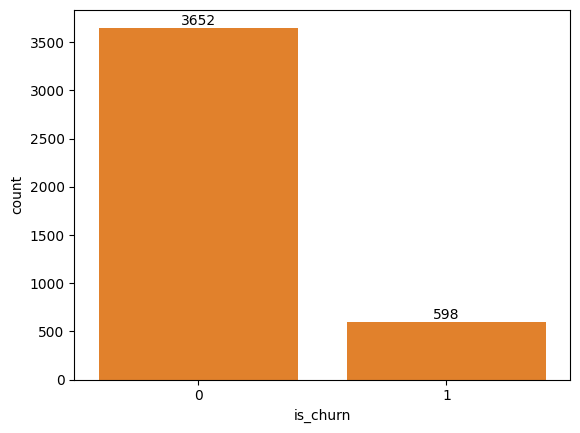

In [ ]:
ax = sns.countplot(data=data, x="is_churn")
ax.bar_label(ax.containers[0])
display(data["is_churn"].value_counts()/len(data))
create_count_plot(data["is_churn"], orient = "horizontal")

From the Target Variable we can see in term of percentage around 85% is not churn and 14% is churn

## 3.2 Demographics Characteristics
  - State
  - Area Code
  ---------------
  - Number Customer Service Calls
  - International Plan
  - Voice Mail Plan
  - Total International Charge
  - Total Day Charge
  - Total Eve Charge
  - Total Night Charge
  - Total Whole Day Charge

### 3.2.1 State

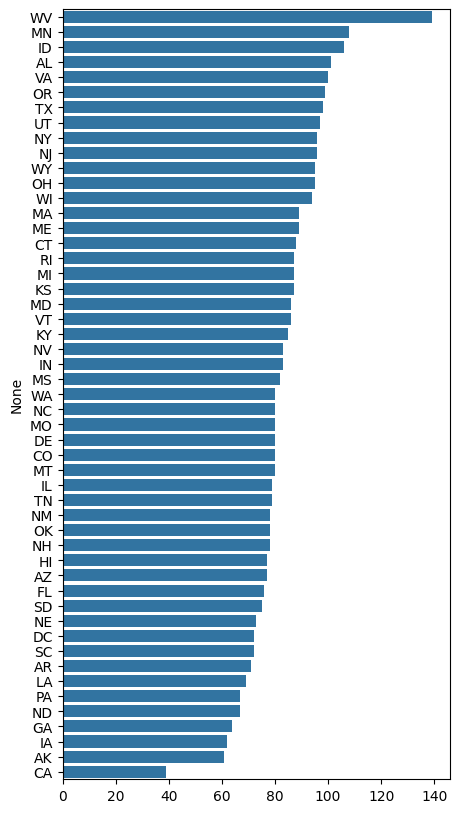

In [ ]:
plt.figure(figsize=(5,10))
create_count_plot(data["state"],orient = "vertical")
#display(data["state"].value_counts()/len(data))

In [ ]:
state_churn = data[["state","is_churn"]].groupby("state").mean().reset_index()
state_churn.sort_values("is_churn",ascending=False).head()

,state,is_churn
31,NJ,0.270833
4,CA,0.256410
47,WA,0.225000
20,MD,0.220930
26,MT,0.212500


### 3.2.2 Area Code

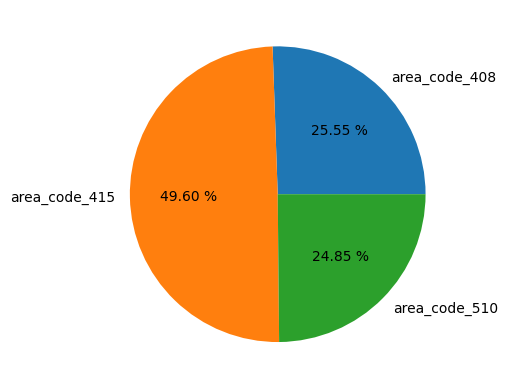

In [ ]:
count_by_area_code = data.groupby('area_code')['area_code'].count().reset_index(name="count")
plt.pie(count_by_area_code['count'],
        labels=count_by_area_code["area_code"], autopct='%.2f %%')
plt.show()

area_code_415    0.496000
area_code_408    0.255529
area_code_510    0.248471
Name: area_code, dtype: float64

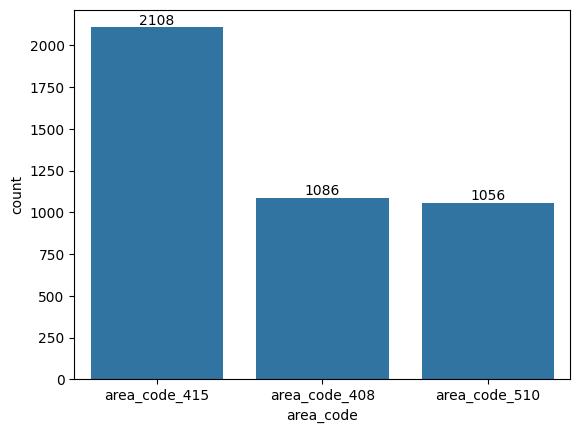

In [ ]:
ax = sns.countplot(data=data, x="area_code")
ax.bar_label(ax.containers[0])
display(data["area_code"].value_counts()/len(data))

### 3.2.3 Customer Service Calls

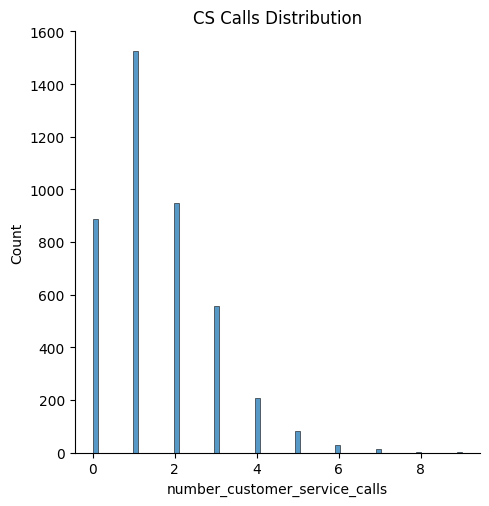

count    4250.000000
mean        1.559059
std         1.311434
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: number_customer_service_calls, dtype: float64

In [ ]:
sns.displot(data["number_customer_service_calls"])
plt.title("CS Calls Distribution")
plt.show()
display(data["number_customer_service_calls"].describe())

,number_customer_service_calls
is_churn,
0,1.441676
1,2.275920


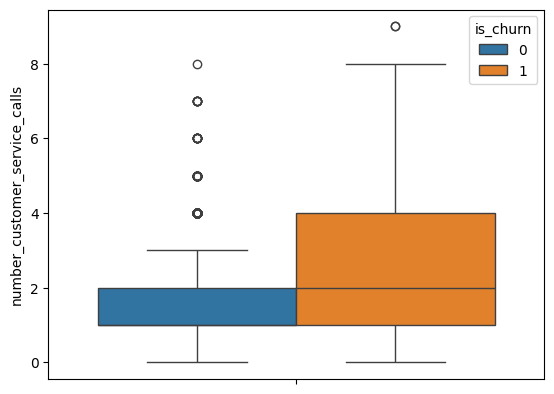

In [ ]:
sns.boxplot(y= data["number_customer_service_calls"],hue=data["is_churn"])
display(data[["number_customer_service_calls","is_churn"]].groupby("is_churn").mean())

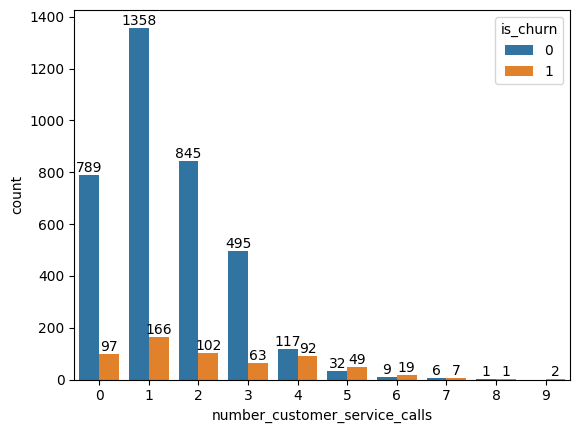

In [ ]:
ax = sns.countplot(x=data["number_customer_service_calls"],
              hue=data["is_churn"])
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
CS_call_churn = data[["number_customer_service_calls","is_churn"]].groupby("number_customer_service_calls").mean().reset_index()
CS_call_churn.sort_values("is_churn",ascending=False).head()

,number_customer_service_calls,is_churn
9,9,1.000000
6,6,0.678571
5,5,0.604938
7,7,0.538462
8,8,0.500000


### 3.2.4 International Plan

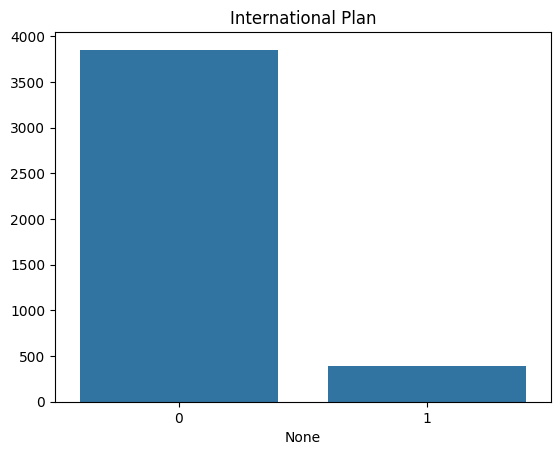

0    0.906824
1    0.093176
Name: is_intl_plan, dtype: float64

In [ ]:
plt.title("International Plan")
create_count_plot(data["is_intl_plan"])
display(data["is_intl_plan"].value_counts()/len(data))

,is_intl_plan
is_churn,
0,0.062705
1,0.279264


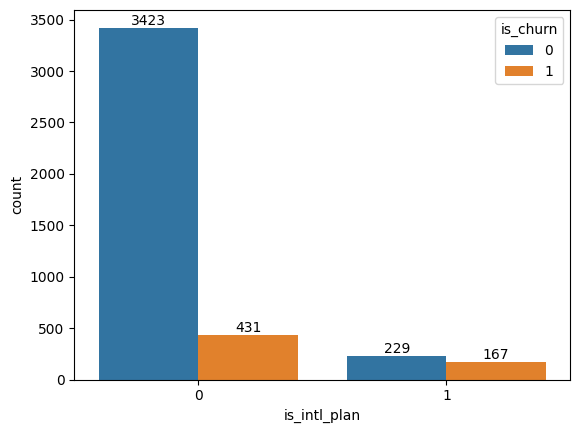

In [ ]:
ax = sns.countplot(x=data["is_intl_plan"],
              hue=data["is_churn"])
for i in ax.containers:
    ax.bar_label(i,)

display(data[["is_intl_plan","is_churn"]].groupby("is_churn").mean())

### 3.2.5 Voice Mail Plan

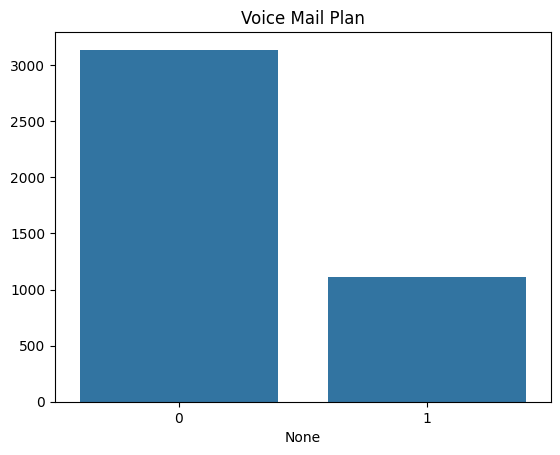

0    0.738353
1    0.261647
Name: is_vmail_plan, dtype: float64

In [ ]:
plt.title("Voice Mail Plan")
create_count_plot(data["is_vmail_plan"])
display(data["is_vmail_plan"].value_counts()/len(data))

,is_vmail_plan
is_churn,
0,0.282037
1,0.137124


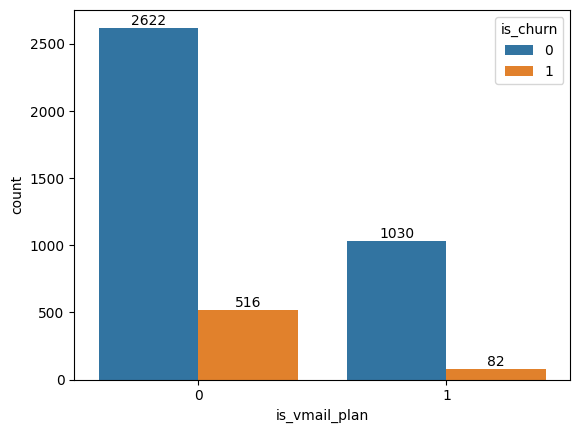

In [ ]:
ax = sns.countplot(x=data["is_vmail_plan"],
              hue=data["is_churn"])
for i in ax.containers:
    ax.bar_label(i,)

display(data[["is_vmail_plan","is_churn"]].groupby("is_churn").mean())

### 3.2.6 Total International Charge

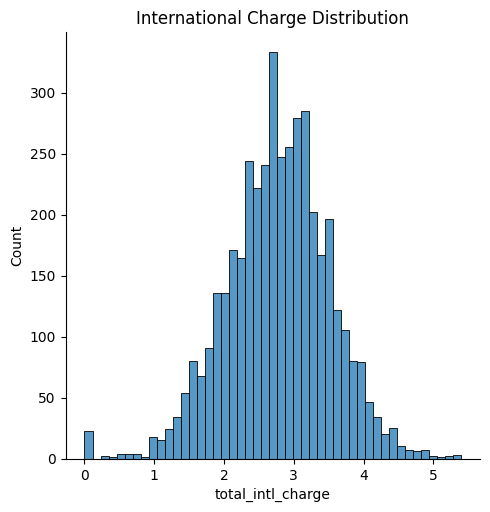

count    4250.000000
mean        2.769654
std         0.745204
min         0.000000
25%         2.300000
50%         2.780000
75%         3.240000
max         5.400000
Name: total_intl_charge, dtype: float64

In [ ]:
sns.displot(data["total_intl_charge"])
plt.title("International Charge Distribution")
plt.show()
display(data["total_intl_charge"].describe())

,total_intl_charge
is_churn,
0,2.753018
1,2.871254


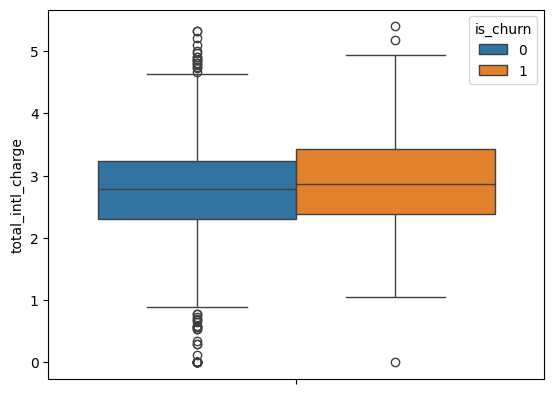

In [ ]:
sns.boxplot(y= data["total_intl_charge"],hue=data["is_churn"])
display(data[["total_intl_charge","is_churn"]].groupby("is_churn").mean())

### 3.2.7 Total Day Charge

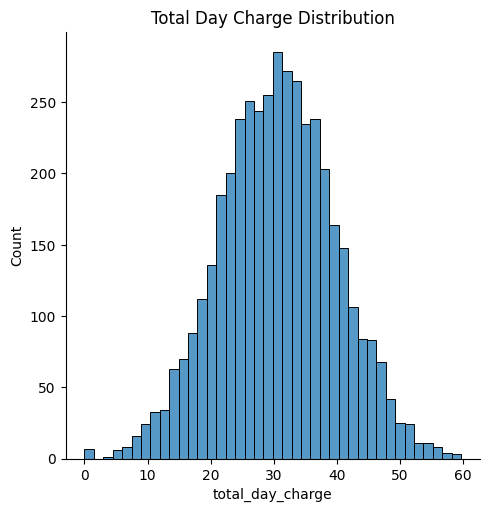

count    4250.000000
mean       30.644682
std         9.182096
min         0.000000
25%        24.365000
50%        30.680000
75%        36.750000
max        59.760000
Name: total_day_charge, dtype: float64

In [ ]:
sns.displot(data["total_day_charge"])
plt.title("Total Day Charge Distribution")
plt.show()
display(data["total_day_charge"].describe())

,total_day_charge
is_churn,
0,29.844948
1,35.528679


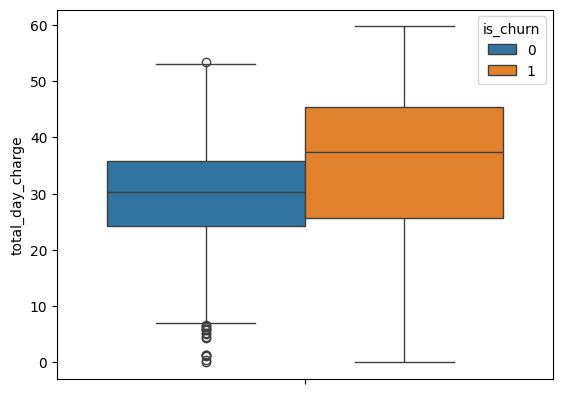

In [ ]:
sns.boxplot(y= data["total_day_charge"],hue=data["is_churn"])
display(data[["total_day_charge","is_churn"]].groupby("is_churn").mean())

### 3.2.8 Total Evening Charge

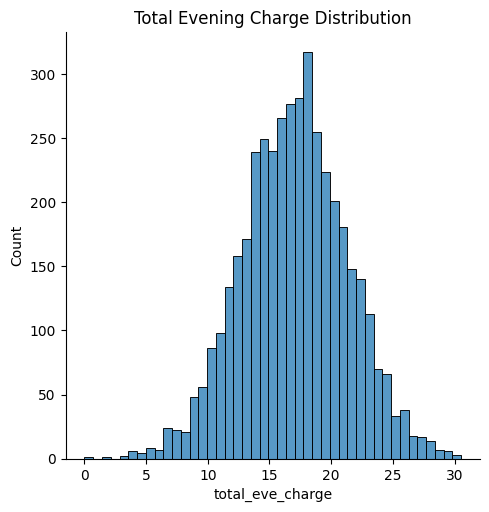

count    4250.000000
mean       17.015012
std         4.271212
min         0.000000
25%        14.102500
50%        17.060000
75%        19.867500
max        30.540000
Name: total_eve_charge, dtype: float64

In [ ]:
sns.displot(data["total_eve_charge"])
plt.title("Total Evening Charge Distribution")
plt.show()
display(data["total_eve_charge"].describe())

,total_eve_charge
is_churn,
0,16.878743
1,17.847207


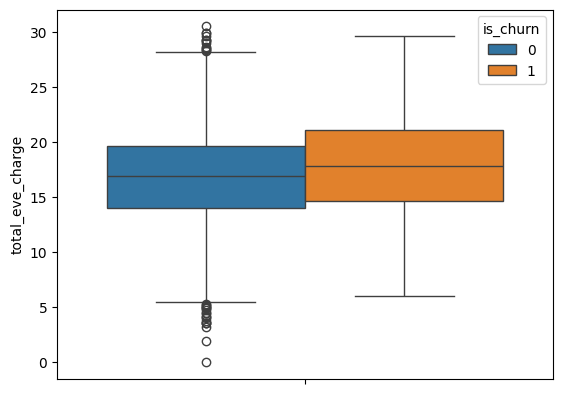

In [ ]:
sns.boxplot(y= data["total_eve_charge"],hue=data["is_churn"])
display(data[["total_eve_charge","is_churn"]].groupby("is_churn").mean())

### 3.2.9 Total Night Charge

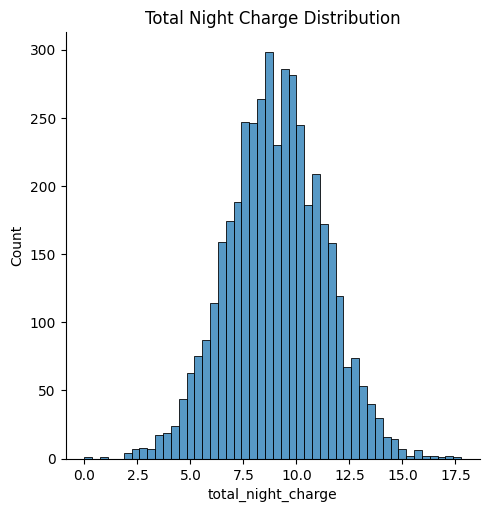

count    4250.000000
mean        9.023892
std         2.265922
min         0.000000
25%         7.522500
50%         9.020000
75%        10.560000
max        17.770000
Name: total_night_charge, dtype: float64

In [ ]:
sns.displot(data["total_night_charge"])
plt.title("Total Night Charge Distribution")
plt.show()
display(data["total_night_charge"].describe())

,total_night_charge
is_churn,
0,8.981131
1,9.285033


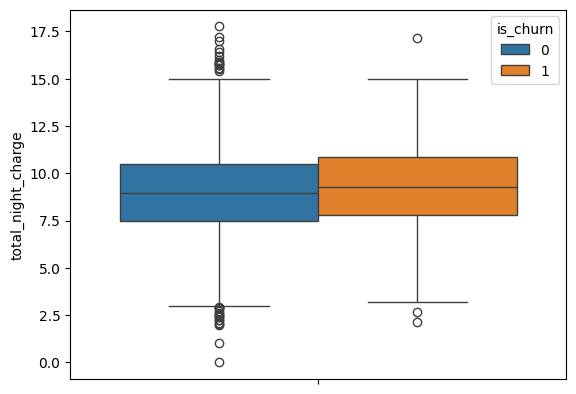

In [ ]:
sns.boxplot(y= data["total_night_charge"],hue=data["is_churn"])
display(data[["total_night_charge","is_churn"]].groupby("is_churn").mean())

### 3.2.10 Total Charge

In [ ]:
#Summing total minutes
data['total_minutes'] = data['total_day_minutes'] + data['total_eve_minutes'] + data['total_night_minutes']
#Summing total calls
data['total_calls'] = data['total_day_calls'] + data['total_eve_calls'] + data['total_night_calls']
#Summing total charge
data['total_charge'] = data['total_day_charge'] + data['total_eve_charge'] + data['total_night_charge']

In [ ]:
#Summing total minutes
data_test['total_minutes'] = data_test['total_day_minutes'] + data_test['total_eve_minutes'] + data_test['total_night_minutes']
#Summing total calls
data_test['total_calls'] = data_test['total_day_calls'] + data_test['total_eve_calls'] + data_test['total_night_calls']
#Summing total charge
data_test['total_charge'] = data_test['total_day_charge'] + data_test['total_eve_charge'] + data_test['total_night_charge']

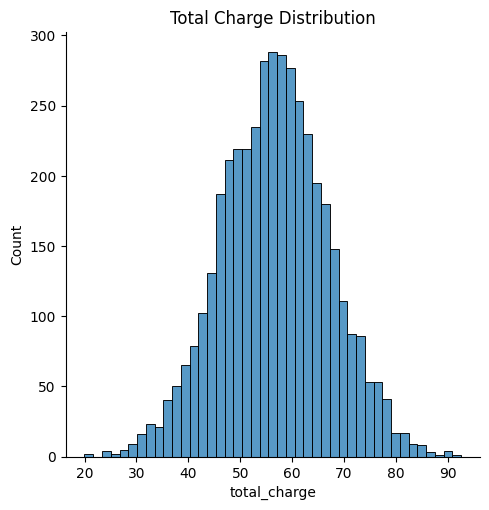

count    4250.000000
mean       56.683586
std        10.334156
min        19.980000
25%        49.592500
50%        56.680000
75%        63.447500
max        92.560000
Name: total_charge, dtype: float64

In [ ]:
sns.displot(data["total_charge"])
plt.title("Total Charge Distribution")
plt.show()
display(data["total_charge"].describe())

,total_charge
is_churn,
0,55.704822
1,62.660920


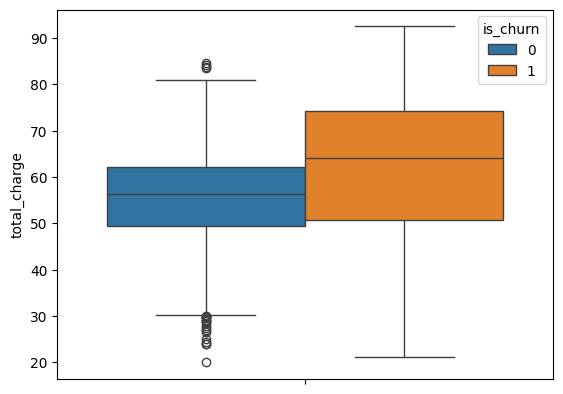

In [ ]:
sns.boxplot(y= data["total_charge"],hue=data["is_churn"])
display(data[["total_charge","is_churn"]].groupby("is_churn").mean())

###Feature Correlation

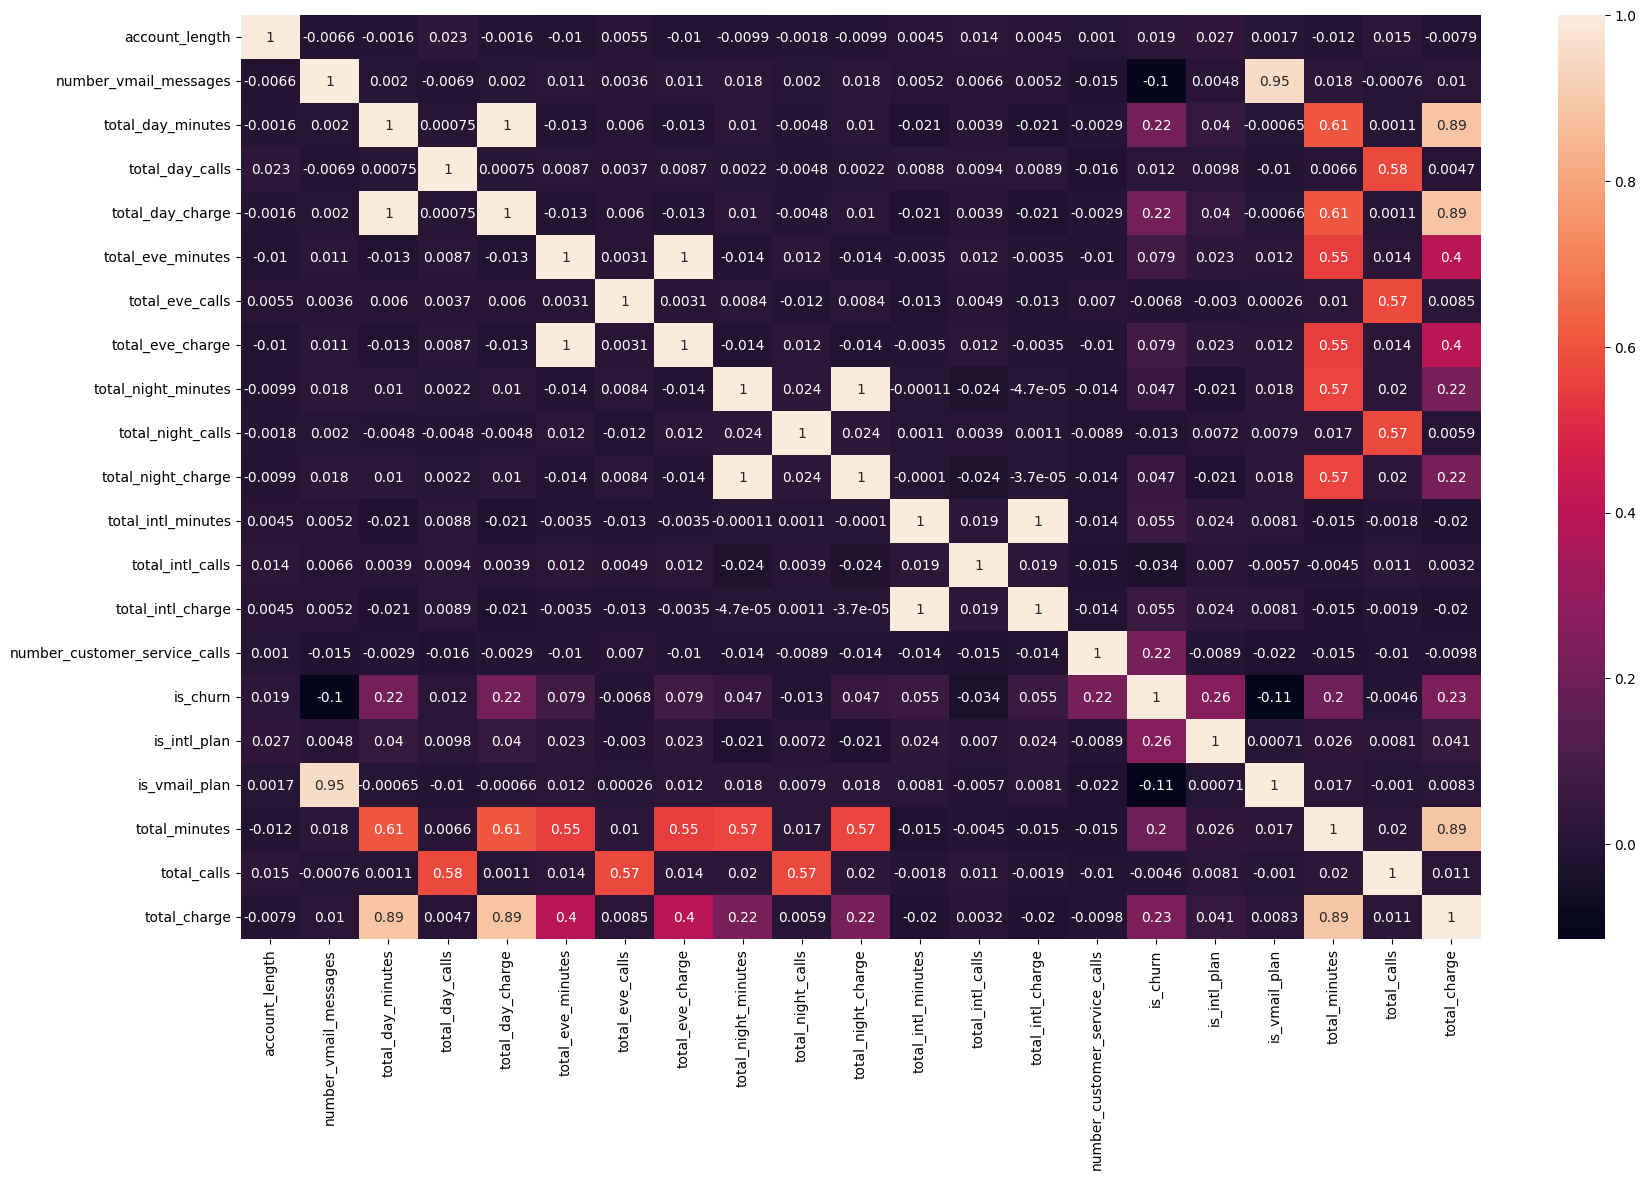

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True)
plt.show()

####Drop

In [ ]:
#Drop column that has high correlation with other feature
data.drop("churn",axis=1,inplace=True)
data.drop("total_night_minutes",axis=1,inplace=True)
data.drop("total_day_minutes",axis=1,inplace=True)
data.drop("total_eve_minutes",axis=1,inplace=True)
data.drop("total_intl_minutes",axis=1,inplace=True)
data.drop("number_vmail_messages",axis=1,inplace=True)
data.drop("total_minutes",axis=1,inplace=True)
data.drop("total_day_charge",axis=1,inplace=True)
data.drop("international_plan",axis=1,inplace=True)
data.drop("voice_mail_plan",axis=1,inplace=True)

In [ ]:
data_test.drop("total_night_minutes",axis=1,inplace=True)
data_test.drop("total_day_minutes",axis=1,inplace=True)
data_test.drop("total_eve_minutes",axis=1,inplace=True)
data_test.drop("total_intl_minutes",axis=1,inplace=True)
data_test.drop("number_vmail_messages",axis=1,inplace=True)
data_test.drop("total_minutes",axis=1,inplace=True)
data_test.drop("total_day_charge",axis=1,inplace=True)
data_test.drop("international_plan",axis=1,inplace=True)
data_test.drop("voice_mail_plan",axis=1,inplace=True)

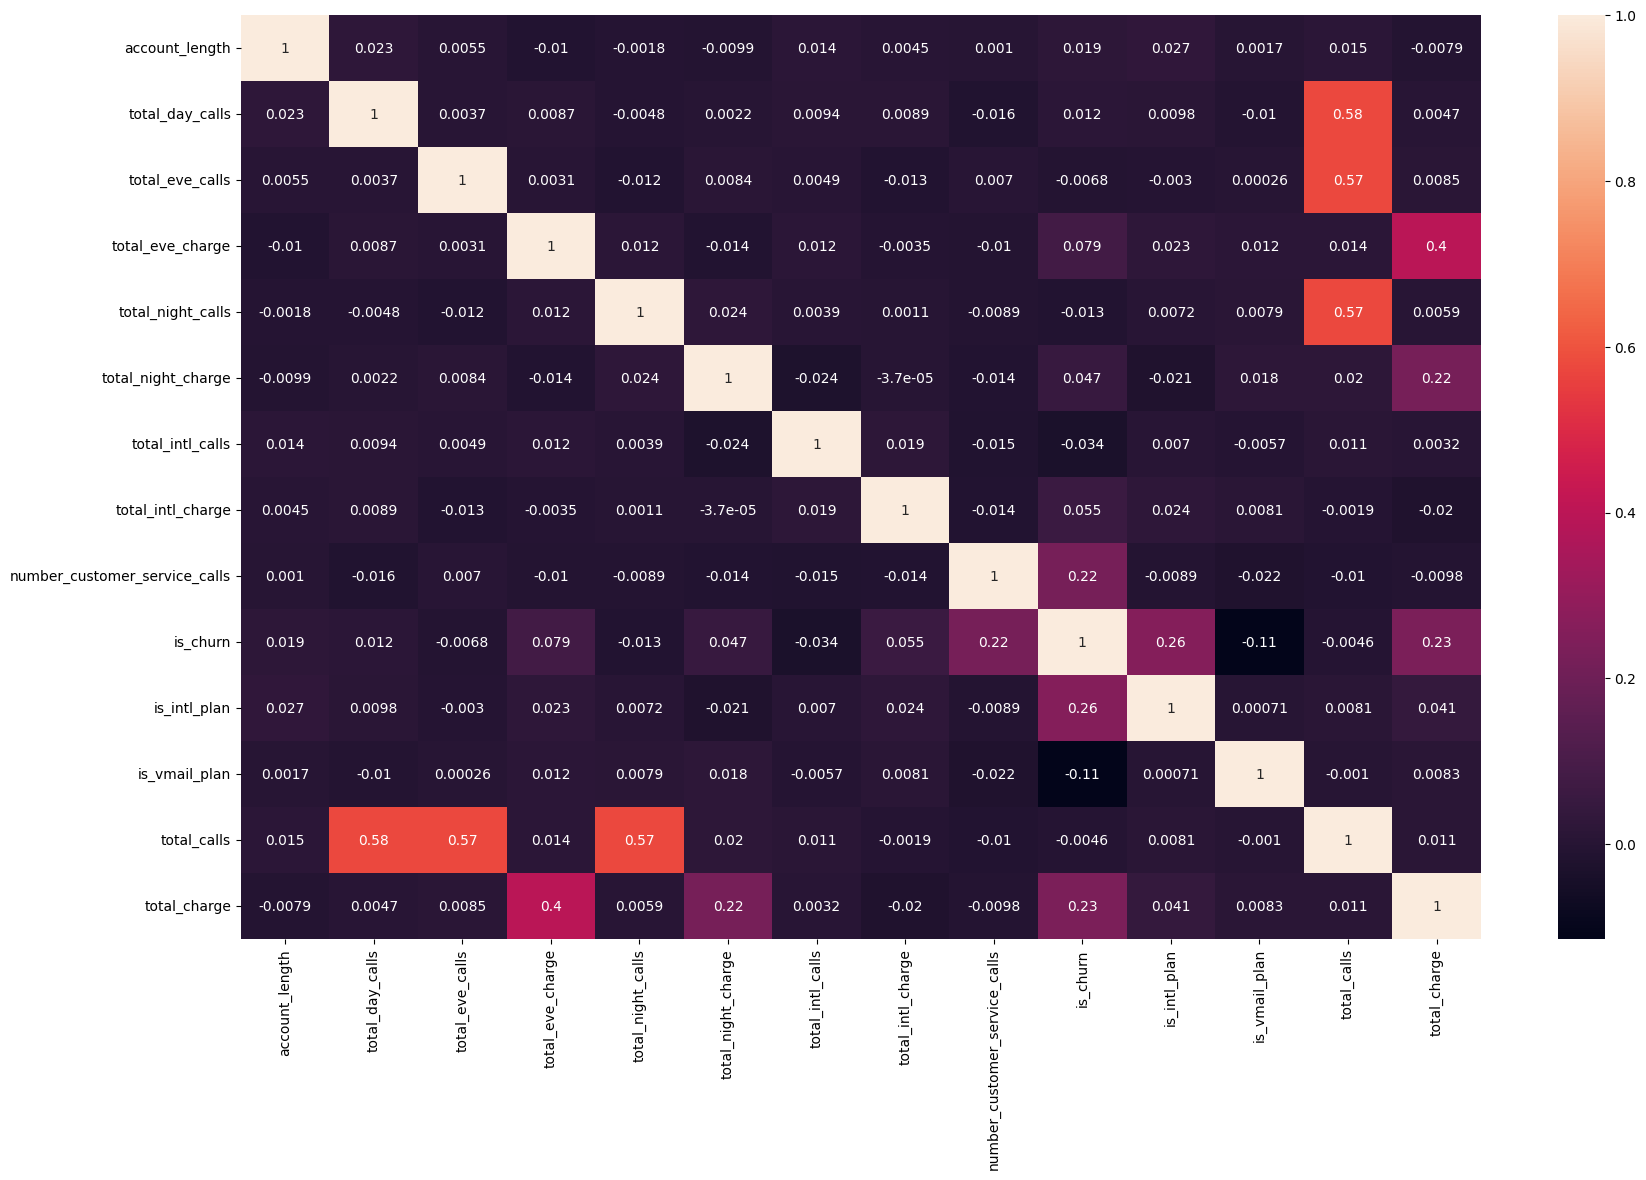

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True)
plt.show()

So, we have is_intl_plan(International Plan), total_charge, number_cs_calls, and is_vmail_plan (Voice mail Plan) that are highly contributed with churn prediction.

# 4. Data Engineering
  - Check Missing Values & Duplicate
  - Data Cleansing
  - Feature Engineering

## 4.1 Check Missing Values & Duplicate

In [ ]:
data.isnull().sum()

state                            0
account_length                   0
area_code                        0
total_day_calls                  0
total_eve_calls                  0
total_eve_charge                 0
total_night_calls                0
total_night_charge               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
is_churn                         0
is_intl_plan                     0
is_vmail_plan                    0
total_calls                      0
total_charge                     0
dtype: int64

No missing values, no need data cleansing

In [ ]:
data.duplicated().sum()

0

## 4.3 Feature Engineering

In [ ]:
data.head()

,state,account_length,area_code,total_day_calls,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,is_churn,is_intl_plan,is_vmail_plan,total_calls,total_charge
0,OH,107,area_code_415,123,103,16.62,103,11.45,3,3.70,1,0,0,1,329,55.54
1,NJ,137,area_code_415,114,110,10.30,104,7.32,5,3.29,0,0,0,0,328,59.00
2,OH,84,area_code_408,71,88,5.26,89,8.86,7,1.78,2,0,1,0,248,65.02
3,OK,75,area_code_415,113,122,12.61,121,8.41,3,2.73,3,0,1,0,356,49.36
4,MA,121,area_code_510,88,108,29.62,118,9.57,7,2.03,3,0,0,1,314,76.28


In [ ]:
data_test.head()

,id,state,account_length,area_code,total_day_calls,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,is_intl_plan,is_vmail_plan,total_calls,total_charge
0,1,KS,128,area_code_415,110,99,16.78,91,11.01,3,2.70,1,0,1,300,72.86
1,2,AL,118,area_code_510,98,101,18.75,118,9.18,6,1.70,0,1,0,317,65.91
2,3,IA,62,area_code_415,70,76,26.11,99,9.14,6,3.54,4,0,0,245,55.77
3,4,VT,93,area_code_510,114,111,18.55,121,5.83,3,2.19,3,0,0,346,56.80
4,5,NE,174,area_code_415,76,112,23.55,115,11.28,5,4.19,3,0,0,303,55.96


In [ ]:
data[["state","is_churn"]].groupby("state").mean()

,is_churn
state,
AK,0.065574
AL,0.128713
AR,0.154930
AZ,0.090909
CA,0.256410
CO,0.112500
CT,0.170455
DC,0.111111
DE,0.162500


### 4.3.1 One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#### Data Train

In [ ]:
### Buat Function untuk automation
def return_categorical_numerical_features(data):
  categorical = [] ### Object, String, Char
  numerical = [] ### Int, BigInt, Float, ....
  for col in data.columns:
    if str(data[col].dtype) == "object":
      categorical.append(col)
    else:
      numerical.append(col)
  return categorical, numerical

categorical, numerical = return_categorical_numerical_features(data)

In [ ]:
categorical

['state', 'area_code']

In [ ]:
#str(data["state"].dtype)
for cat in categorical:
    ## One Hot Encoding
    onehots = pd.get_dummies(data[cat], prefix=cat)
    data = data.join(onehots)

#### Data Test

In [ ]:
def return_categorical_numerical_features(data):
  categorical = [] ### Object, String, Char
  numerical = [] ### Int, BigInt, Float, ....
  for col in data_test.columns:
    if str(data_test[col].dtype) == "object":
      categorical.append(col)
    else:
      numerical.append(col)
  return categorical, numerical

categorical, numerical = return_categorical_numerical_features(data_test)

In [ ]:
categorical

['state', 'area_code']

In [ ]:
#str(data["state"].dtype)
for cat in categorical:
    ## One Hot Encoding
    onehots = pd.get_dummies(data_test[cat], prefix=cat)
    data_test = data_test.join(onehots)

In [ ]:
def pipeline_feature_preprocessing(data):

#  print("[INFO] Target Mean Encoding for Categorical Features")
#  data = run_target_mean_encoding(data=data, data_train = data_train)

#  print("[INFO] Add New Columns")
#  data = add_new_column(data=data)

  print("[INFO] Define All Used Columns for Modelling Purpose")
  drop_col = ["id","state","area_code","churn"]
  data = data.drop(drop_col, axis=1,errors="ignore")

  return data


df_train = pipeline_feature_preprocessing(data=data)
df_test = pipeline_feature_preprocessing(data=data_test)
print(df_train.shape, df_test.shape)

[INFO] Define All Used Columns for Modelling Purpose
[INFO] Define All Used Columns for Modelling Purpose
(4250, 68) (750, 67)


# 5. Modelling
   - Train Test Split
   - Model Fitting
   - Model Selection

## 5.1 Train Test Split

In [ ]:
drop_col = []
target_col = ["is_churn"]
X = df_train.drop(drop_col+target_col,axis=1)
y = df_train[target_col]

col_for_model = X.columns.tolist()
df_test_model = df_test[col_for_model]
print(X.shape, y.shape)

(4250, 67) (4250, 1)


In [ ]:
X.head(2)

,account_length,total_day_calls,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,is_intl_plan,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,107,123,103,16.62,103,11.45,3,3.70,1,0,...,0,0,0,0,0,0,0,0,1,0
1,137,114,110,10.30,104,7.32,5,3.29,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

test_size = 0.33
seed = 150000
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=test_size,
                                                                    random_state=seed,
                                                                    stratify = y)
print("Data Train:",X_train.shape, Y_train.shape)
print("Data Validation:",X_val.shape, Y_val.shape)

Data Train: (2847, 67) (2847, 1)
Data Validation: (1403, 67) (1403, 1)


## 5.2 Model Fitting

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [ ]:
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier()
model_nb = GaussianNB()

print("Run Logistics Regression")
model_lr.fit(X_train, Y_train)
print("Run Decision Tree")
model_dt.fit(X_train, Y_train)
print("Run Random Forest")
model_rf.fit(X_train, Y_train)
print("Run Gradient Boosting")
model_gb.fit(X_train, Y_train)
print("Run Naive Bayes")
model_nb.fit(X_train, Y_train)

Run Logistics Regression
Run Decision Tree
Run Random Forest
Run Gradient Boosting
Run Naive Bayes


GaussianNB()

In [ ]:
model_list = ["model_lr","model_dt","model_rf","model_gb","model_nb"]
score_train = []
score_test = []
for model in model_list:
  open_model = eval(model)
  result_train = open_model.score(X_train,Y_train)
  result_test = open_model.score(X_val,Y_val)
  score_train.append(result_train)
  score_test.append(result_test)

df_eval = pd.DataFrame()
df_eval["model"] = model_list
df_eval["acc_train"] = score_train
df_eval["acc_test"] = score_test
# df_eval["prec_train"] = score_train
# df_eval["prec_test"] = score_test
# df_eval["recall_train"] = score_train
# df_eval["recall_test"] = score_test
# df_eval["auc_train"] = score_train
# df_eval["auc_test"] = score_test
df_eval

,model,acc_train,acc_test
0,model_lr,0.866526,0.861012
1,model_dt,1.000000,0.950107
2,model_rf,0.999649,0.962937
3,model_gb,0.982086,0.967926
4,model_nb,0.564454,0.538845


In [ ]:
def model_comparison_engine(X=X, y=y, fold = 5, sampling_method = None):

  kfold = model_selection.KFold(n_splits=fold, shuffle = True, random_state=42)

  model_lr = LogisticRegression()
  model_dt = DecisionTreeClassifier()
  model_rf = RandomForestClassifier()
  model_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
  model_nb = GaussianNB()

  model_list = ["model_lr","model_dt","model_rf","model_gb","model_nb"]
  acc_list = []
  prec_list = []
  rec_list = []
  auc_list = []
  f1_list = []
  for model in model_list:
    print(model)
    open_model = eval(model)

    if sampling_method == 'SMOTE':
      X_resampled, y_resampled = SMOTE().fit_resample(X, y)
    elif sampling_method == 'oversampling':
      X_resampled, y_resampled = RandomOverSampler().fit_resample(X, y)
    elif sampling_method == 'undersampling':
      X_resampled, y_resampled = RandomUnderSampler().fit_resample(X, y)
    else:
      X_resampled, y_resampled = X, y

    accuracy = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
    precision = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='precision')
    recall = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='recall')
    auc = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='roc_auc')
    f1 = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='f1')

    acc_list.append(accuracy.mean())
    prec_list.append(precision.mean())
    rec_list.append(recall.mean())
    auc_list.append(auc.mean())
    f1_list.append(f1.mean())

  df_eval = pd.DataFrame()
  df_eval["model"] = model_list
  df_eval["accuracy"] = acc_list
  df_eval["precision"] = prec_list
  df_eval["recall"] = rec_list
  df_eval["auc"] = auc_list
  df_eval["f1_score"] = f1_list

  return df_eval

In [ ]:
model_comparison_engine(X=X, y=y, fold = 5, sampling_method = None)

model_lr
model_dt
model_rf
model_gb
model_nb


,model,accuracy,precision,recall,auc,f1_score
0,model_lr,0.861176,0.529197,0.139163,0.767142,0.215925
1,model_dt,0.951765,0.801993,0.835695,0.898445,0.828791
2,model_rf,0.969176,0.979404,0.792705,0.922283,0.872464
3,model_gb,0.971529,0.978757,0.815013,0.927862,0.888164
4,model_nb,0.579059,0.186904,0.592322,0.628933,0.283668


# 6. Predict Data Test

In [ ]:
def train_model(X,y):
  model_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
  model_gb.fit(X,y)
  return model_gb
model_churn = train_model(X,y)

In [ ]:
X.columns

Index(['account_length', 'total_day_calls', 'total_eve_calls',
       'total_eve_charge', 'total_night_calls', 'total_night_charge',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'is_intl_plan', 'is_vmail_plan',
       'total_calls', 'total_charge', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'area_code_area_code_408', 'area_

In [ ]:
df_test.columns

Index(['account_length', 'total_day_calls', 'total_eve_calls',
       'total_eve_charge', 'total_night_calls', 'total_night_charge',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'is_intl_plan', 'is_vmail_plan',
       'total_calls', 'total_charge', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'area_code_area_code_408', 'area_

In [ ]:
data_test["is_churn"] = model_churn.predict(df_test_model)
data_test["churn"] = data_test["is_churn"].apply(lambda x:"yes" if x==1 else "no")
data_test

,id,state,account_length,area_code,total_day_calls,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,is_churn,churn
0,1,KS,128,area_code_415,110,99,16.78,91,11.01,3,...,0,0,0,0,0,0,1,0,0,no
1,2,AL,118,area_code_510,98,101,18.75,118,9.18,6,...,0,0,0,0,0,0,0,1,0,no
2,3,IA,62,area_code_415,70,76,26.11,99,9.14,6,...,0,0,0,0,0,0,1,0,0,no
3,4,VT,93,area_code_510,114,111,18.55,121,5.83,3,...,1,0,0,0,0,0,0,1,0,no
4,5,NE,174,area_code_415,76,112,23.55,115,11.28,5,...,0,0,0,0,0,0,1,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,99,97,19.24,111,9.12,7,...,0,0,0,0,0,0,1,0,0,no
746,747,WA,73,area_code_408,118,84,22.99,112,10.88,2,...,0,1,0,0,0,1,0,0,0,no
747,748,WV,152,area_code_415,90,73,21.83,113,9.61,2,...,0,0,0,1,0,0,1,0,0,no
748,749,DC,61,area_code_415,89,128,14.69,97,9.56,4,...,0,0,0,0,0,0,1,0,0,no


# 7. Model Interpretation

In [ ]:
df_imp = pd.DataFrame()
df_imp["features"] = X_train.columns.tolist()
df_imp["importance"] = model_gb.feature_importances_
df_imp.sort_values("importance",ascending=False)

,features,importance
12,total_charge,0.457935
8,number_customer_service_calls,0.140240
10,is_vmail_plan,0.126383
9,is_intl_plan,0.093493
6,total_intl_calls,0.075394
...,...,...
36,state_MN,0.000000
37,state_MO,0.000000
39,state_MT,0.000000
43,state_NH,0.000000


# 8. Explain Model

no     0.878667
yes    0.121333
Name: churn, dtype: float64

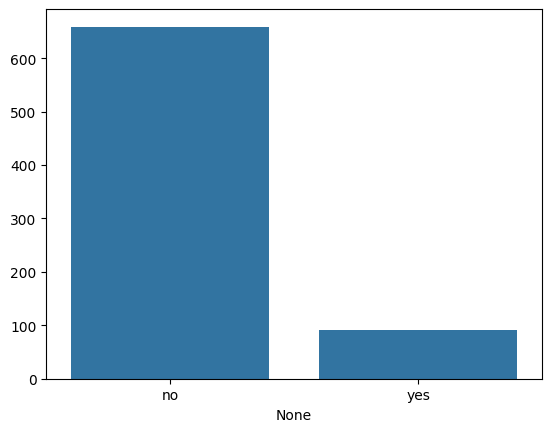

In [ ]:
display(data_test["churn"].value_counts()/len(data_test))
create_count_plot(data_test["churn"], orient = "horizontal")

From prediction data test we can see in term of percentage around 87% is not churn and 12% is churn

In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.1 MB/s eta 0:00:00


In [ ]:
## Tree Based Model
# Create SHAP explainer
explainer = shap.Explainer(model_churn, X)
# Calculate SHAP values
shap_values = explainer(df_test)

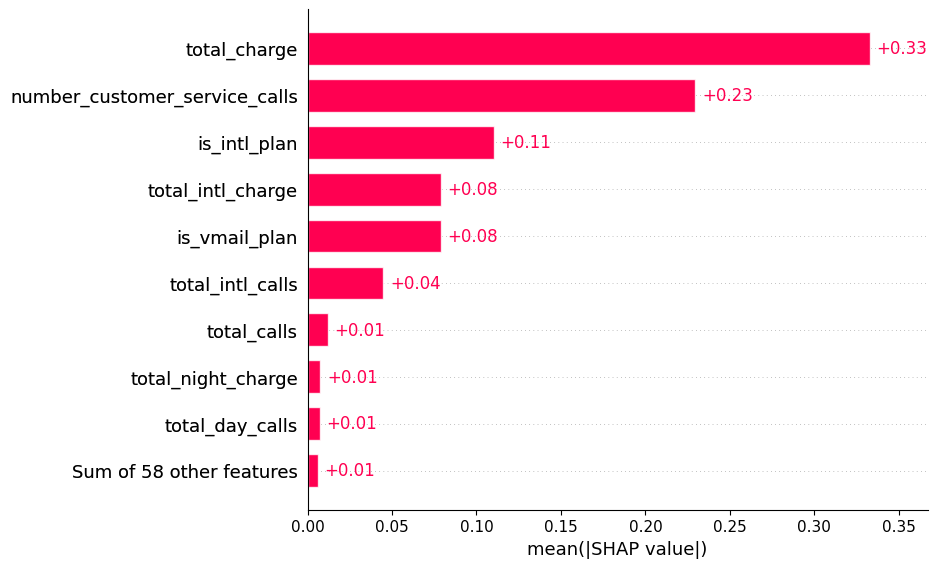

In [ ]:
# GLOBAL FEATURE CONTRIBUTION
shap.plots.bar(shap_values)

From the model we tried and apllied it to Data Test, we got total_charge, number_cs_calls, and is_intl_plan are the features that highly corelated with customer churn.

In [ ]:
# LOCAL FEATURE CONTRIBUTION
def predict_and_explain(data=data_test, id=1):
  df_test_filter_id = data_test[data_test.id==id]
  df_test = pipeline_feature_preprocessing(df_test_filter_id)
  df_test_model = df_test[col_for_model]
  prediction = model_churn.predict(df_test_model)
  if prediction == 1:
    print()
    print("Prediction = CHURN")
  else:
    print()
    print("Prediction = NOT CHURN")
  shap_values = explainer(df_test_model)
  shap.plots.bar(shap_values[0])

[INFO] Define All Used Columns for Modelling Purpose

Prediction = NOT CHURN


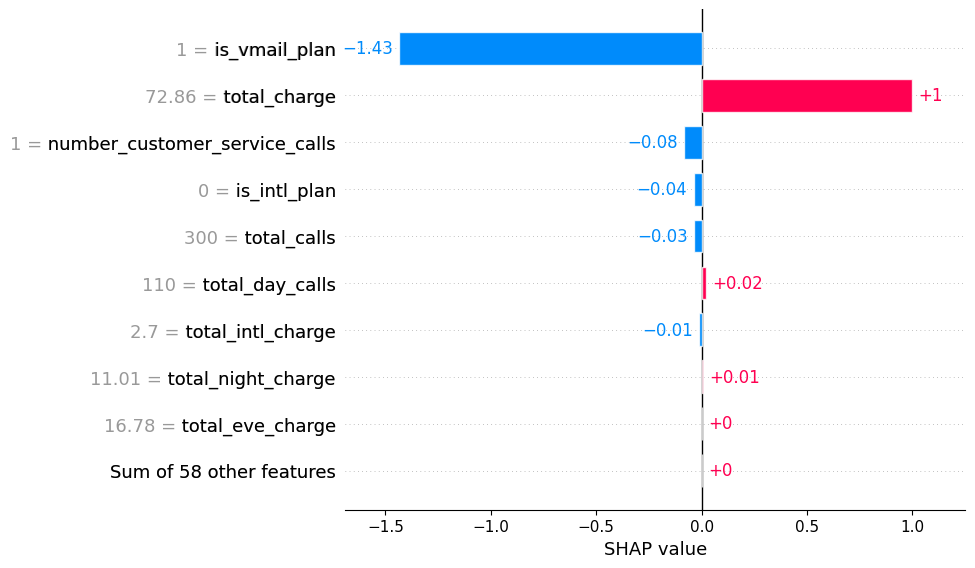

In [ ]:
predict_and_explain(data=data_test, id=1)

For example, for customer id 1, we predict that the customer is not churn because they use Voice mail plan, total charge is 72.86, and only have 1 number CS calls. We conclude that our voice mail plan bring benefit to them

[INFO] Define All Used Columns for Modelling Purpose

Prediction = CHURN


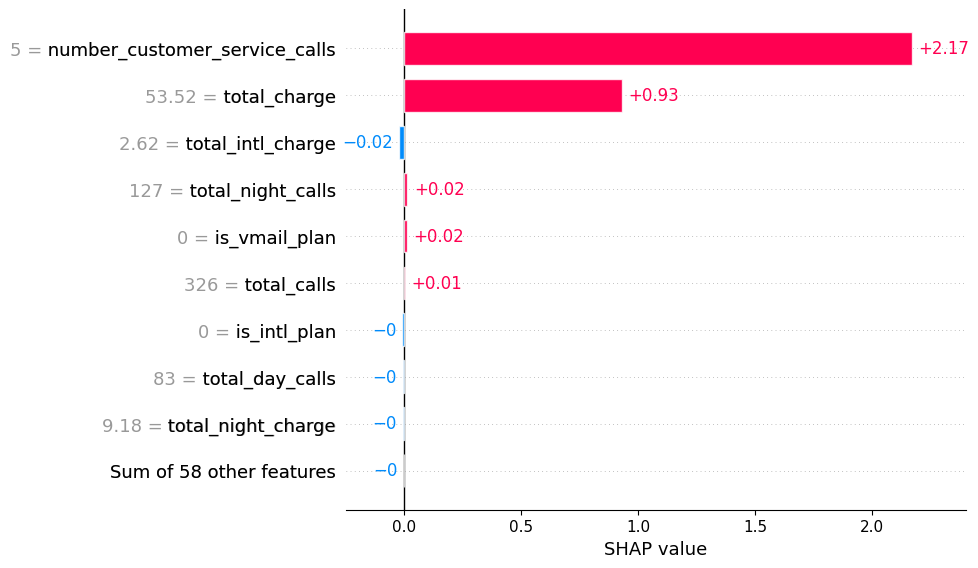

In [ ]:
predict_and_explain(data=data_test, id=11)

For example, for customer id 11, we predict that the customer is churn because they have called CS number 5 times and the total charge is 53.52. We can conclude that maybe there is problem with the service and the problem has not finished yet